In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dive into our project, 'ML Revolution in Healthcare: The Diabetes Risk Prediction Challenge Using BRFSS Survey Data.' With 50,000 responses from the Behavioral Risk Factor Surveillance System at your fingertips, your mission is to navigate data intricacies and class imbalances.

Join the community in constructing various models, including Logistic Regression, Decision Tree, Random Forest, KNN, XGBoost, and AdaBoost. As a registered participant, your task is to preprocess the provided dataset, build robust models, and make predictions on the test data.

This is more than just a challenge; it's an open competition where your skills can reshape the landscape of risk assessment. Your efforts will contribute to proactive interventions and play a vital role in the evolution of public health initiatives.

You're all set! Get ready to make an impact and be a part of the future of healthcare with your innovative machine learning solutions!
Problem Statement: This project addresses the pressing issue of diabetes prevalence in the United States, aiming to predict distinct risk categories using the Behavioral Risk Factor Surveillance System (BRFSS) 2015 dataset. The dataset, comprising 50,000 survey responses, poses a challenge due to class imbalance. The objective is to develop a predictive model that effectively classifies individuals into three categories: 0 for no diabetes/only during pregnancy, 1 for prediabetes, and 2 for diabetes. The emphasis is on mitigating class imbalance to enhance the accuracy of the predictive modeling process.

About the Dataset: The dataset used in this project is sourced from the CDC's Behavioral Risk Factor Surveillance System (BRFSS) 2015, obtained from the UC Irvine Machine Learning Repository. It comprises 21 feature variables and a target variable (Diabetes_012) categorizing respondents into stages: 0 for no diabetes/only during pregnancy, 1 for prediabetes, and 2 for diabetes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/train_dataset.csv")

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,Yes,Yes,Yes,28.0,No,No,Yes,Yes,Yes,...,Yes,No,3.0,0.0,0.0,No,Male,10.0,6.0,6.0
1,1.0,No,Yes,Yes,38.0,No,No,No,No,Yes,...,No,Yes,4.0,7.0,0.0,No,Female,3.0,5.0,6.0
2,2.0,No,Yes,Yes,NaN,Yes,No,No,No,Yes,...,Yes,No,4.0,30.0,0.0,No,Male,7.0,4.0,1.0
3,2.0,Yes,No,Yes,28.0,Yes,No,No,Yes,No,...,Yes,No,2.0,0.0,0.0,No,Male,11.0,6.0,6.0
4,0.0,No,Yes,Yes,20.0,Yes,No,No,No,Yes,...,Yes,No,4.0,30.0,30.0,Yes,Female,7.0,2.0,2.0


Data Cleaning:
Data preprocessing involves cleaning the dataset by handling missing values, removing duplicates, and addressing any inconsistencies or errors. This ensures the data is accurate and reliable for analysis.
Data Cleaning:
Data preprocessing involves cleaning the dataset by handling missing values, removing duplicates, and addressing any inconsistencies or errors. This ensures the data is accurate and reliable for analysis.

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
numerical_feat=['BMI','Age','Education','Income']
bin_cat_feat=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                               'MentHlth', 'PhysHlth', 'DiffWalk']
scaler=StandardScaler()
df[numerical_feat]=scaler.fit_transform(df[numerical_feat])
label=LabelEncoder()
df[bin_cat_feat]=df[bin_cat_feat].apply(label.fit_transform)

After Transforming

In [ ]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,-0.162349,0,0,1,1,1,...,1,0,2,0,0,0,Male,0.558874,1.022132,0.068517
1,1,0,1,1,1.303820,0,0,0,0,1,...,0,1,3,7,0,0,Female,-1.779938,0.033671,0.068517
3,2,1,0,1,-0.162349,1,0,0,1,0,...,1,0,1,0,0,0,Male,0.892990,1.022132,0.068517
4,0,0,1,1,-1.335284,1,0,0,0,1,...,1,0,3,30,30,1,Female,-0.443474,-2.931713,-1.812304
5,0,0,0,1,1.010586,0,0,0,1,1,...,1,0,2,3,3,0,Female,-1.111706,-0.954791,-0.401688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51012,0,0,1,1,-1.042050,0,0,0,1,1,...,0,1,0,0,0,0,Female,0.224758,1.022132,-1.342099
51013,0,0,1,1,0.424119,1,0,0,0,1,...,1,0,1,0,15,0,Male,-0.109358,-0.954791,1.008927
51014,2,1,1,1,0.130885,0,0,0,1,1,...,1,0,1,0,0,0,Female,0.558874,-0.954791,0.538722
51015,1,1,0,1,6.142177,1,0,0,1,0,...,1,0,1,0,0,0,Male,0.224758,-1.943252,-0.871893


## Visualizing Outliers

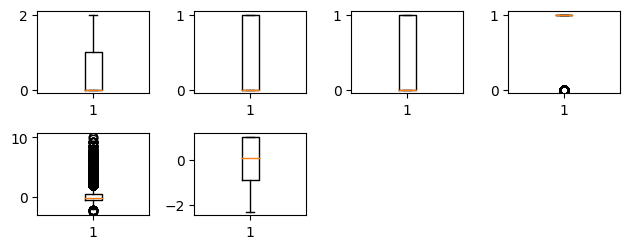

In [ ]:
import seaborn as sns
l=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Income']
n=1
for i in l:
  plt.subplot(4,4,n)
  n+=1
  plt.boxplot(df[i])
  plt.tight_layout()

# Handling Outliers:
Data preprocessing includes identifying and handling outliers—data points that deviate significantly from the majority. Techniques such as truncation, imputation, or applying statistical methods are employed to manage outliers and prevent them from unduly influencing analysis or modeling.

In [ ]:
numerical_features = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Income']

# Calculate the IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define a condition to filter out outliers
outlier_condition = ~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Apply the condition to filter out outliers
outliers = df[outlier_condition.all(axis=1)]

# Display the DataFrame after handling outliers
print("\nDataFrame after handling outliers:")
outliers


DataFrame after handling outliers:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,-0.162349,0,0,1,1,1,...,1,0,2,0,0,0,Male,0.558874,1.022132,0.068517
1,1,0,1,1,1.303820,0,0,0,0,1,...,0,1,3,7,0,0,Female,-1.779938,0.033671,0.068517
3,2,1,0,1,-0.162349,1,0,0,1,0,...,1,0,1,0,0,0,Male,0.892990,1.022132,0.068517
4,0,0,1,1,-1.335284,1,0,0,0,1,...,1,0,3,30,30,1,Female,-0.443474,-2.931713,-1.812304
5,0,0,0,1,1.010586,0,0,0,1,1,...,1,0,2,3,3,0,Female,-1.111706,-0.954791,-0.401688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51011,0,0,0,1,-0.015732,0,0,0,1,1,...,1,0,1,1,1,0,Female,-0.777590,1.022132,1.008927
51012,0,0,1,1,-1.042050,0,0,0,1,1,...,0,1,0,0,0,0,Female,0.224758,1.022132,-1.342099
51013,0,0,1,1,0.424119,1,0,0,0,1,...,1,0,1,0,15,0,Male,-0.109358,-0.954791,1.008927
51014,2,1,1,1,0.130885,0,0,0,1,1,...,1,0,1,0,0,0,Female,0.558874,-0.954791,0.538722


# Data Splitting:
The dataset is split into training and testing sets. The training set is used to train the ML model, and the testing set is used to evaluate its performance.

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Diabetes_012',axis=1)
y=df['Diabetes_012']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, " y:", y_test.shape)

Training set shape - X: (38046, 21)  y: (38046,)
Testing set shape - X: (9512, 21)  y: (9512,)


# Model Selection:
Choose an appropriate ML model based on the nature of the problem (classification) and the characteristics of the data. Common models include Logistic Regression, Decision Tree, Random Forest, KNN, XGBoost, and AdaBoost.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Encoding categorical variables if needed
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])  # Example, assuming 'Sex' is categorical

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"\n{name} Model:")
  print(f"Accuracy: {accuracy:.4f}")
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print("Classification Report:")
  print(classification_report(y_test, y_pred))



Logistic Regression Model:
Accuracy: 0.6984
Confusion Matrix:
[[5631    0  604]
 [ 664    0  265]
 [1336    0 1012]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      6235
           1       0.00      0.00      0.00       929
           2       0.54      0.43      0.48      2348

    accuracy                           0.70      9512
   macro avg       0.43      0.44      0.43      9512
weighted avg       0.62      0.70      0.65      9512



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Decision Tree Model:
Accuracy: 0.5774
Confusion Matrix:
[[4427  598 1210]
 [ 503  134  292]
 [1063  354  931]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      6235
           1       0.12      0.14      0.13       929
           2       0.38      0.40      0.39      2348

    accuracy                           0.58      9512
   macro avg       0.41      0.42      0.42      9512
weighted avg       0.59      0.58      0.58      9512


Random Forest Model:
Accuracy: 0.6862
Confusion Matrix:
[[5459   37  739]
 [ 646    3  280]
 [1268   15 1065]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      6235
           1       0.05      0.00      0.01       929
           2       0.51      0.45      0.48      2348

    accuracy                           0.69      9512
   macro avg       0.44      0.44      0.43      9512
weighted avg       0.62

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Training:
Train the selected model on the training data. This involves feeding the model the input data and allowing it to learn the patterns within the data.

In [ ]:
model=LogisticRegression()

model.fit(X_train,y_train)

y_pred=model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_output)


Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      6235
           1       0.00      0.00      0.00       929
           2       0.54      0.43      0.48      2348

    accuracy                           0.70      9512
   macro avg       0.43      0.44      0.43      9512
weighted avg       0.62      0.70      0.65      9512



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tuning:
Fine-tune the model's hyperparameters to optimize its performance. This may involve using techniques like grid search or random search.

In [ ]:
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_search=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.7001682085786375
